# Introduction
This notebook will handle a denoising autoencoder on the MNIST-dataset.

# Imports

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from functools import partial
from sklearn.model_selection import train_test_split

from random import seed
seed(1)
seed = 43

import tensorflow as tf
from tensorflow import keras
from tensorflow import image
from tensorflow import core
from tensorflow.keras import layers
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ",keras.__version__)


kaggle = 0 # Kaggle path active = 1

# change your local path here
if kaggle == 1 :
    MNIST_PATH= '../input/digit-recognizer'
else:
    MNIST_PATH= '../autoencoding-mnist/data/input/digit-recognizer'



import os
for dirname, _, filenames in os.walk(MNIST_PATH): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
../autoencoding-mnist/data/input/digit-recognizer\keras_reg_160_10_002.sav
../autoencoding-mnist/data/input/digit-recognizer\keras_reg_jl_160_10_002.sav
../autoencoding-mnist/data/input/digit-recognizer\sample_submission.csv
../autoencoding-mnist/data/input/digit-recognizer\test.csv
../autoencoding-mnist/data/input/digit-recognizer\train.csv


## Get Data And Prepare It

In [35]:
# Data path and file
CSV_FILE_TRAIN='train.csv'
CSV_FILE_TEST='test.csv'

def load_mnist_data(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    return pd.read_csv(csv_path)

def load_mnist_data_manuel(minist_path, csv_file):
    csv_path = os.path.join(minist_path, csv_file)
    csv_file = open(csv_path, 'r')
    csv_data = csv_file.readlines()
    csv_file.close()
    return csv_data

def split_train_val(data, val_ratio):
    return 
    

train = load_mnist_data(MNIST_PATH,CSV_FILE_TRAIN)
test = load_mnist_data(MNIST_PATH,CSV_FILE_TEST)

### Train Val Split

In [36]:
X_train, X_valid, y_train, y_val =  train_test_split(train.loc[:, train.columns != 'label'], train['label'], test_size=0.33, random_state=42)

### Preparing for Neural Network Structure

In [37]:
X_train_prep = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_valid_prep = X_valid.values.reshape(X_valid.shape[0], 28, 28, 1)

y_train =  y_train.values.reshape(y_train.shape[0], 1)
y_val = y_val.values.reshape(y_val.shape[0], 1)

# Plotting 

In [56]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid_prep[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))

    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid_prep[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
    


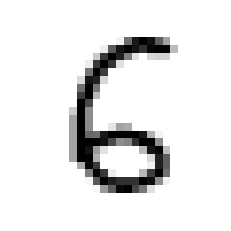

In [57]:
plot_image(X_valid_prep[5])

# Model Creation - Deep Denoising Autoencoder

In [40]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))


In [41]:
history = dropout_ae.fit(X_train_prep, X_train_prep, epochs= 10, validation_data=(X_valid_prep, X_valid_prep))

Epoch 1/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.8384 - val_loss: 7231.4497
Epoch 2/10
880/880 [==============================] - 1s 1ms/step - loss: 7254.7773 - val_loss: 7231.4497
Epoch 3/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.7861 - val_loss: 7231.4482
Epoch 4/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.7822 - val_loss: 7231.4478
Epoch 5/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.7793 - val_loss: 7231.4478
Epoch 6/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.7788 - val_loss: 7231.4478
Epoch 7/10
880/880 [==============================] - 1s 2ms/step - loss: 7254.7856 - val_loss: 7231.4478
Epoch 8/10
880/880 [==============================] - 1s 1ms/step - loss: 7254.7803 - val_loss: 7231.4478
Epoch 9/10
880/880 [==============================] - 1s 1ms/step - loss: 7254.7876 - val_loss: 7231.4570
Epoch 10/10
880/880 [=========================

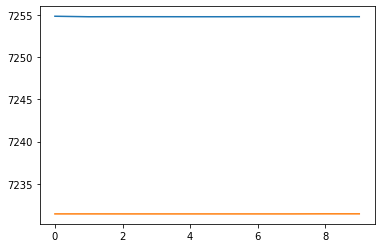

In [50]:
# Getting in touch with the model statistics 
# shows the available keys in models history:  print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [61]:
X_valid_prep[:1]

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

In [60]:
#plot_image()
dropout_ae.predict(X_valid_prep[:1])

array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
         1.1117221e-32, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.000000

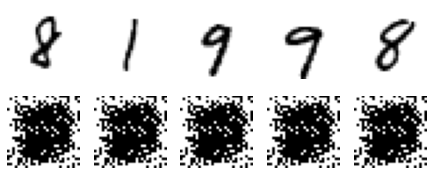

In [62]:
show_reconstructions(dropout_ae)